In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Random Forest: MSE = 855151.4195459685, R2 = 0.43893369950906225
Gradient Boosting: MSE = 893200.5010808537, R2 = 0.41396963241414875
Decision Tree: MSE = 1326718.498437471, R2 = 0.12953773718060246
XGBoost: MSE = 942056.5608702571, R2 = 0.3819150885099143
Extra Trees: MSE = 884293.4499383864, R2 = 0.41981356381455626

Resultats avant optimisation:
Random Forest: MSE = 855151.4195459685, R2 = 0.43893369950906225
Gradient Boosting: MSE = 893200.5010808537, R2 = 0.41396963241414875
Decision Tree: MSE = 1326718.498437471, R2 = 0.12953773718060246
XGBoost: MSE = 942056.5608702571, R2 = 0.3819150885099143
Extra Trees: MSE = 884293.4499383864, R2 = 0.41981356381455626


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest (Optimiser): MSE = 804490.0836858249, R2 = 0.47217268811305857
Gradient Boosting (Optimiser): MSE = 807666.914458504, R2 = 0.4700883640411191


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Decision Tree (Optimiser): MSE = 841620.9760031641, R2 = 0.4478110465250953
XGBoost (Optimiser): MSE = 826352.0257973983, R2 = 0.45782903071890957


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Extra Trees (Optimiser): MSE = 787091.1592342441, R2 = 0.48358815203142835

Resultats apres optimisation:
Random Forest (Optimiser): MSE = 804490.0836858249, R2 = 0.47217268811305857
Gradient Boosting (Optimiser): MSE = 807666.914458504, R2 = 0.4700883640411191
Decision Tree (Optimiser): MSE = 841620.9760031641, R2 = 0.4478110465250953
XGBoost (Optimiser): MSE = 826352.0257973983, R2 = 0.45782903071890957
Extra Trees (Optimiser): MSE = 787091.1592342441, R2 = 0.48358815203142835


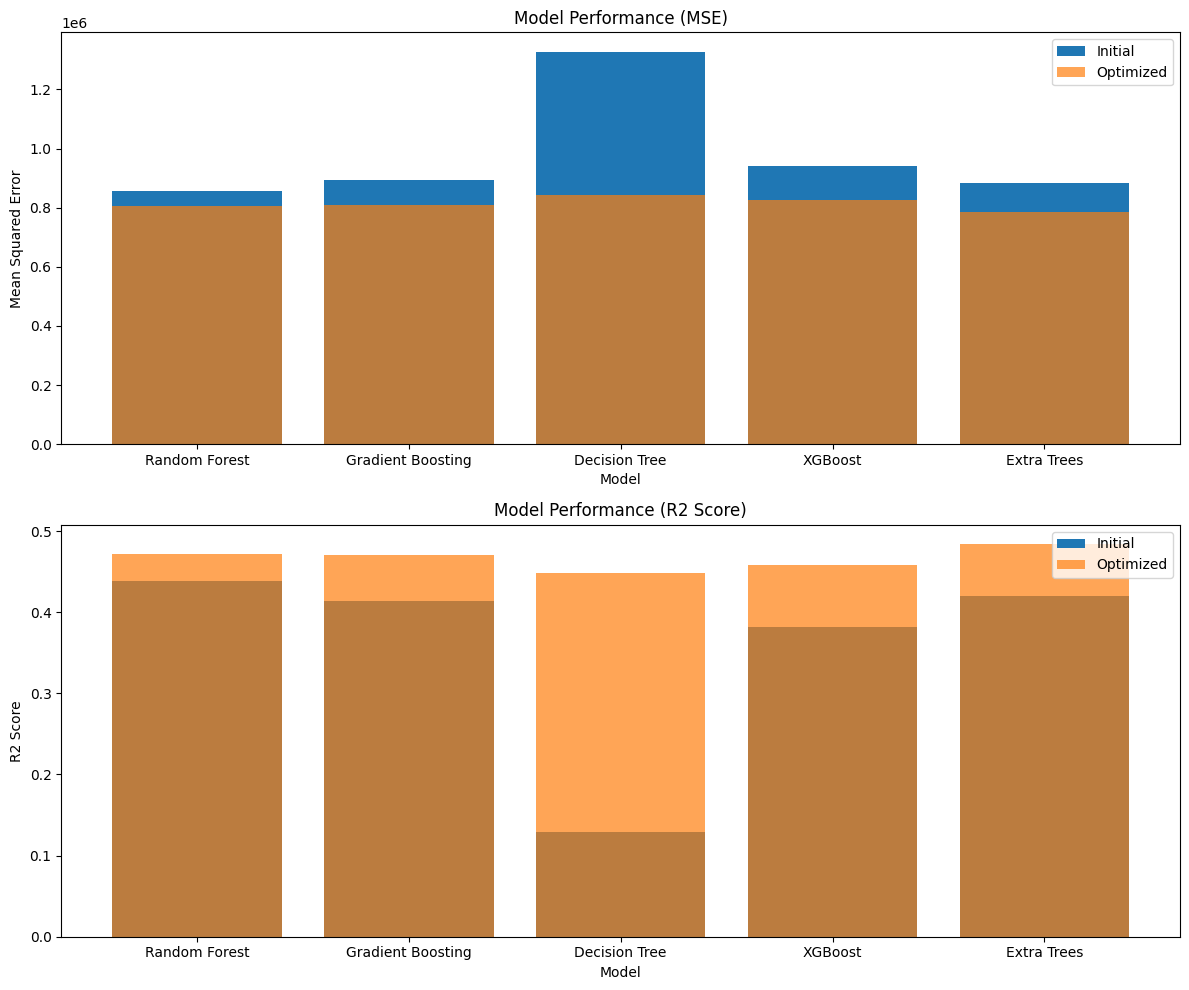

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint, uniform as sp_uniform

# Load data
data = pd.read_csv("/content/drive/MyDrive/Orders (1).csv", encoding='latin1')

# Preprocess data
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Day'] = data['Order Date'].dt.day
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

# Features and target
features = ['Day', 'Month', 'Year', 'Quantity', 'Unit Price', 'Discount']
target = 'Total Cost'

# Convert categorical variables to dummy/indicator variables
data = pd.get_dummies(data, columns=['Country', 'City', 'Category', 'Sub Category'])

# Split data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate models without optimization
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name}: MSE = {mse}, R2 = {r2}")

# Display results before optimization
print("\nResultats avant optimisation:")
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']}, R2 = {metrics['R2']}")

# Optimize models using RandomizedSearchCV
param_distributions = {
    'Random Forest': {
        'n_estimators': sp_randint(100, 1000),
        'max_depth': sp_randint(10, 50),
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_samples_split': sp_randint(2, 20),
        'min_samples_leaf': sp_randint(1, 20),
        'bootstrap': [True, False]
    },
    'Gradient Boosting': {
        'n_estimators': sp_randint(100, 1000),
        'learning_rate': sp_uniform(0.01, 0.2),
        'max_depth': sp_randint(3, 10),
        'subsample': sp_uniform(0.5, 0.5),
        'min_samples_split': sp_randint(2, 20),
        'min_samples_leaf': sp_randint(1, 20)
    },
    'Decision Tree': {
        'max_depth': sp_randint(5, 50),
        'min_samples_split': sp_randint(2, 20),
        'min_samples_leaf': sp_randint(1, 20),
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'XGBoost': {
        'n_estimators': sp_randint(100, 1000),
        'learning_rate': sp_uniform(0.01, 0.2),
        'max_depth': sp_randint(3, 10),
        'subsample': sp_uniform(0.5, 0.5),
        'colsample_bytree': sp_uniform(0.5, 0.5),
        'gamma': sp_uniform(0, 0.5)
    },
    'Extra Trees': {
        'n_estimators': sp_randint(100, 1000),
        'max_depth': sp_randint(10, 50),
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_samples_split': sp_randint(2, 20),
        'min_samples_leaf': sp_randint(1, 20),
        'bootstrap': [True, False]
    }
}

optimized_results = {}
for name, model in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions[name],
                                       n_iter=100, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    optimized_results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} (Optimiser): MSE = {mse}, R2 = {r2}")

# Display results after optimization
print("\nResultats apres optimisation:")
for name, metrics in optimized_results.items():
    print(f"{name} (Optimiser): MSE = {metrics['MSE']}, R2 = {metrics['R2']}")

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot MSE
ax[0].bar(results.keys(), [metrics['MSE'] for metrics in results.values()], label='Initial')
ax[0].bar(optimized_results.keys(), [metrics['MSE'] for metrics in optimized_results.values()], label='Optimized', alpha=0.7)
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('Model Performance (MSE)')
ax[0].legend()

# Plot R2 Score
ax[1].bar(results.keys(), [metrics['R2'] for metrics in results.values()], label='Initial')
ax[1].bar(optimized_results.keys(), [metrics['R2'] for metrics in optimized_results.values()], label='Optimized', alpha=0.7)
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R2 Score')
ax[1].set_title('Model Performance (R2 Score)')
ax[1].legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Order ID              int64
Day                   int32
Quantity              int64
Unit Price          float64
Discount            float64
Total Cost          float64
Year                  int32
Month                 int32
Weekday               int32
Total Sales         float64
Discounted Sales    float64
dtype: object
Random Forest: MSE = 0.5676918888888889, R2 = 0.7189719687283804
Gradient Boosting: MSE = 1.148777723972138, R2 = 0.43131344932819804
Decision Tree: MSE = 0.7888888888888889, R2 = 0.6094714480236444
XGBoost: MSE = 0.8633639566129859, R2 = 0.5726035940504481
Extra Trees: MSE = 0.6276348888888889, R2 = 0.6892980142325962

Resultats avant optimisation:
Random Forest: MSE = 0.5676918888888889, R2 = 0.7189719687283804
Gradient Boosting: MSE = 1.148777723972138, R2 = 0.43131344932819804
Decision Tree: MSE = 0.7888888888888889, R2 = 0.6094714480236444
XGBoost: MSE = 0.8633639566129859, R2 = 0.5726035940504481
Extra Trees: MSE = 0.6276348888888889, R2 = 0.6892980142325962


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest (Optimiser): MSE = 0.5527590270801487, R2 = 0.7263642757834892
Gradient Boosting (Optimiser): MSE = 0.10837893726439746, R2 = 0.9463485035336038


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


Decision Tree (Optimiser): MSE = 0.7040620727712663, R2 = 0.6514637921088018
XGBoost (Optimiser): MSE = 0.8477829400771176, R2 = 0.58031676115392


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Extra Trees (Optimiser): MSE = 0.7173851301816355, R2 = 0.6448683964939674

Resultats apres optimisation:
Random Forest (Optimiser): MSE = 0.5527590270801487, R2 = 0.7263642757834892
Gradient Boosting (Optimiser): MSE = 0.10837893726439746, R2 = 0.9463485035336038
Decision Tree (Optimiser): MSE = 0.7040620727712663, R2 = 0.6514637921088018
XGBoost (Optimiser): MSE = 0.8477829400771176, R2 = 0.58031676115392
Extra Trees (Optimiser): MSE = 0.7173851301816355, R2 = 0.6448683964939674


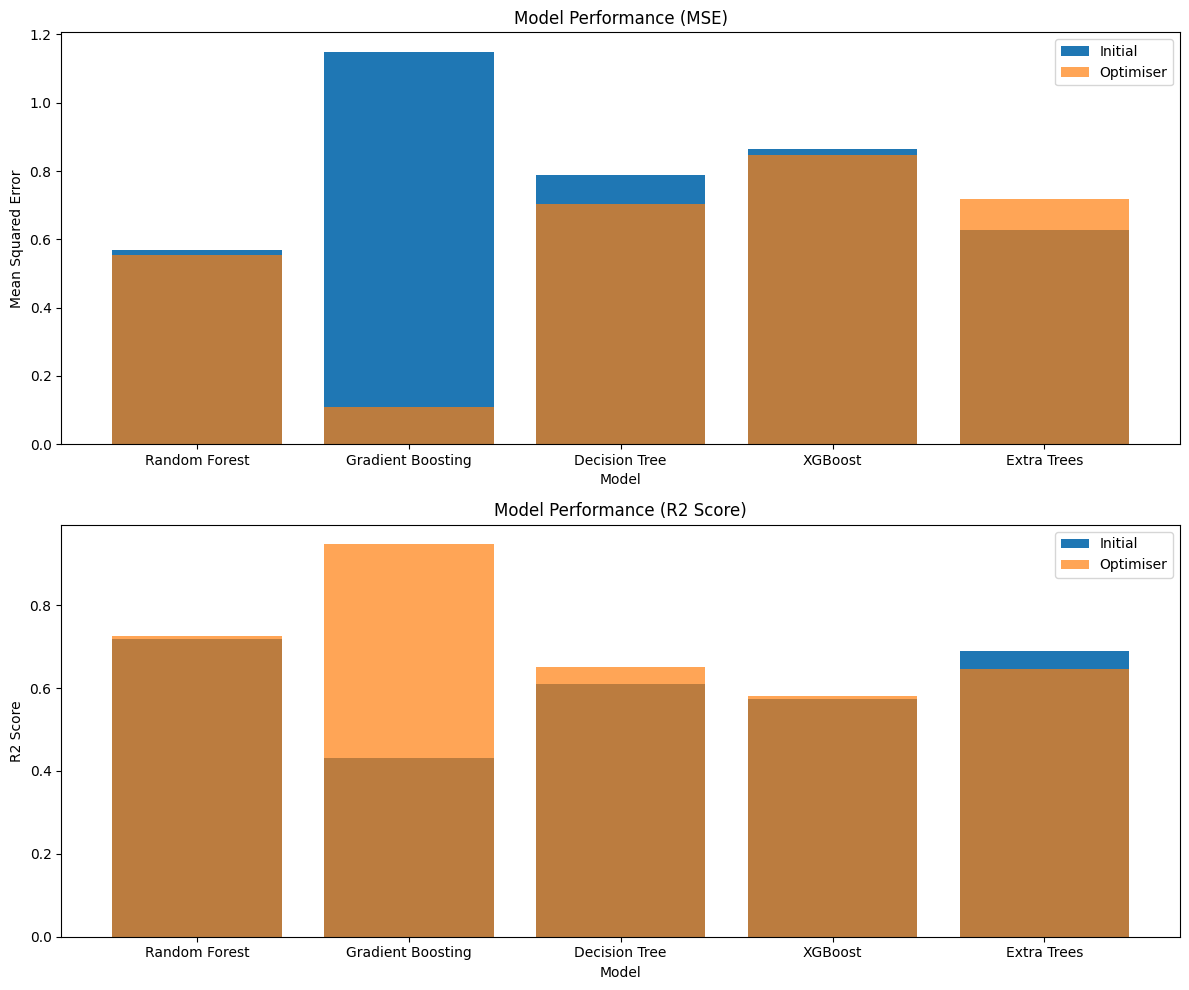

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from scipy.stats import randint as sp_randint, uniform as sp_uniform

# Chargement des données
data = pd.read_csv("/content/drive/MyDrive/Orders (1).csv", encoding='latin1')

# Conversion de la colonne 'Order Date' en datetime avec dayfirst=True
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

# Extraction des caractéristiques temporelles
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day
data['Weekday'] = data['Order Date'].dt.weekday

# Encodage des Variables Catégorielles (garder les colonnes d'origine nécessaires)
categorical_cols = ['Country', 'City', 'Full Name', 'Category', 'Sub Category', 'Item', 'Status']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
data = data.drop(columns=categorical_cols)

# Création de Nouvelles Variables
data['Total Sales'] = data['Quantity'] * data['Unit Price']
data['Discounted Sales'] = data['Total Sales'] * (1 - data['Discount'])
data['Region'] = data['Lat'].astype(str) + '_' + data['Lng'].astype(str)

# Normalisation des Variables Numériques
numeric_cols = ['Unit Price', 'Discount', 'Total Cost', 'Total Sales', 'Discounted Sales']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Suppression des colonnes inutiles et des colonnes datetime
data = data.drop(columns=['Order Date', 'Region', 'Lat', 'Lng', 'SalesPerson ID'])
data=data.head(9000)
# Séparation des Données
X = data.drop(columns=['Quantity'])
y = data['Quantity']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Définition des modèles et des paramètres pour la recherche de grille
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
    'Extra Trees': ExtraTreesRegressor()
}

# Train and evaluate models without optimization
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    print(f"{name}: MSE = {mse}, MAE = {mae}, R2 = {r2}")

# Display results before optimization
print("\nResultats avant optimisation:")
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']}, MAE = {metrics['MAE']}, R2 = {metrics['R2']}")

# Optimize models using RandomizedSearchCV
param_distributions = {
    'Random Forest': {
        'n_estimators': sp_randint(100, 1000),
        'max_depth': sp_randint(10, 50),
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_samples_split': sp_randint(2, 20),
        'min_samples_leaf': sp_randint(1, 20),
        'bootstrap': [True, False]
    },
    'Gradient Boosting': {
        'n_estimators': sp_randint(100, 1000),
        'learning_rate': sp_uniform(0.01, 0.2),
        'max_depth': sp_randint(3, 10),
        'subsample': sp_uniform(0.5, 0.5),
        'min_samples_split': sp_randint(2, 20),
        'min_samples_leaf': sp_randint(1, 20)
    },
    'Decision Tree': {
        'max_depth': sp_randint(5, 50),
        'min_samples_split': sp_randint(2, 20),
        'min_samples_leaf': sp_randint(1, 20),
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'XGBoost': {
        'n_estimators': sp_randint(100, 1000),
        'learning_rate': sp_uniform(0.01, 0.2),
        'max_depth': sp_randint(3, 10),
        'subsample': sp_uniform(0.5, 0.5),
        'colsample_bytree': sp_uniform(0.5, 0.5),
        'gamma': sp_uniform(0, 0.5)
    },
    'Extra Trees': {
        'n_estimators': sp_randint(100, 1000),
        'max_depth': sp_randint(10, 50),
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_samples_split': sp_randint(2, 20),
        'min_samples_leaf': sp_randint(1, 20),
        'bootstrap': [True, False]
    }
}

optimized_results = {}
for name, model in models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions[name],
                                       n_iter=100, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    predictions = best_model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    optimized_results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    print(f"{name} (Optimiser): MSE = {mse}, MAE = {mae}, R2 = {r2}")

# Display results after optimization
print("\nResultats apres optimisation:")
for name, metrics in optimized_results.items():
    print(f"{name} (Optimiser): MSE = {metrics['MSE']}, MAE = {metrics['MAE']}, R2 = {metrics['R2']}")

# Plot results
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Plot MSE
ax[0].bar(results.keys(), [metrics['MSE'] for metrics in results.values()], label='Initial')
ax[0].bar(optimized_results.keys(), [metrics['MSE'] for metrics in optimized_results.values()], label='Optimiser', alpha=0.7)
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('Model Performance (MSE)')
ax[0].legend()

# Plot MAE
ax[1].bar(results.keys(), [metrics['MAE'] for metrics in results.values()], label='Initial')
ax[1].bar(optimized_results.keys(), [metrics['MAE'] for metrics in optimized_results.values()], label='Optimiser', alpha=0.7)
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Mean Absolute Error')
ax[1].set_title('Model Performance (MAE)')
ax[1].legend()

# Plot R2 Score
ax[2].bar(results.keys(), [metrics['R2'] for metrics in results.values()], label='Initial')
ax[2].bar(optimized_results.keys(), [metrics['R2'] for metrics in optimized_results.values()], label='Optimiser', alpha=0.7)
ax[2].set_xlabel('Model')
ax[2].set_ylabel('R2 Score')
ax[2].set_title('Model Performance (R2 Score)')
ax[2].legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
data = pd.read_csv("/content/drive/MyDrive/Orders (1).csv", encoding='latin1')

# Conversion de la colonne 'Order Date' en datetime avec dayfirst=True
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

# Extraction des caractéristiques temporelles
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day
data['Weekday'] = data['Order Date'].dt.weekday

# Encodage des Variables Catégorielles (garder les colonnes d'origine nécessaires)
categorical_cols = ['Country', 'City', 'Full Name', 'Category', 'Sub Category', 'Item', 'Status']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
data = data.drop(columns=categorical_cols).join(encoded_cols)

# Création de Nouvelles Variables
data['Total Sales'] = data['Quantity'] * data['Unit Price']
data['Discounted Sales'] = data['Total Sales'] * (1 - data['Discount'])
data['Region'] = data['Lat'].astype(str) + '_' + data['Lng'].astype(str)

# Normalisation des Variables Numériques
numeric_cols = ['Quantity', 'Unit Price', 'Discount', 'Total Cost', 'Total Sales', 'Discounted Sales']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Suppression des colonnes inutiles et des colonnes datetime
data = data.drop(columns=['Order Date', 'Region', 'Lat', 'Lng','SalesPerson ID'])

# Vérifier les types de données des colonnes restantes
print(data.dtypes)

# Séparation des Données
X = data.drop(columns=['Quantity'])
y = data['Quantity']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Order ID                    int64
Day                         int32
Quantity                  float64
Unit Price                float64
Discount                  float64
                           ...   
Item_iPhone 13 Pro Max    float64
Item_iPhone SE            float64
Status_True               float64
Total Sales               float64
Discounted Sales          float64
Length: 15707, dtype: object
